In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("dataset2.csv")

In [4]:
df.head()

,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,Result
0,1,-1,-1,-1,0,1,1,1,1,-1
1,-1,-1,1,1,0,1,1,1,1,-1
2,-1,-1,-1,-1,0,1,1,1,1,-1
3,0,-1,1,1,0,1,1,1,1,-1
4,0,-1,1,1,0,-1,1,-1,1,1


In [5]:
df.columns

Index(['Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'Result'],
      dtype='object')

In [6]:
df.shape

(11055, 10)

In [7]:
df.isnull().sum()

Links_in_tags          0
SFH                    0
Submitting_to_email    0
Abnormal_URL           0
Redirect               0
on_mouseover           0
RightClick             0
popUpWidnow            0
Iframe                 0
Result                 0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split,cross_val_score

In [9]:
X= df.drop(columns='Result')
X.head()

,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe
0,1,-1,-1,-1,0,1,1,1,1
1,-1,-1,1,1,0,1,1,1,1
2,-1,-1,-1,-1,0,1,1,1,1
3,0,-1,1,1,0,1,1,1,1
4,0,-1,1,1,0,-1,1,-1,1


In [10]:
Y=df['Result']
Y=pd.DataFrame(Y)
Y.head()

,Result
0,-1
1,-1
2,-1
3,-1
4,1


In [11]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.2,random_state=2)

In [12]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [13]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [14]:
logreg_predict= model_1.predict(test_X)

In [15]:
accuracy_score(logreg_predict,test_Y)

0.6639529624604251

In [17]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.49      0.67      0.57       724
           1       0.80      0.66      0.73      1487

    accuracy                           0.66      2211
   macro avg       0.65      0.67      0.65      2211
weighted avg       0.70      0.66      0.67      2211



In [18]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

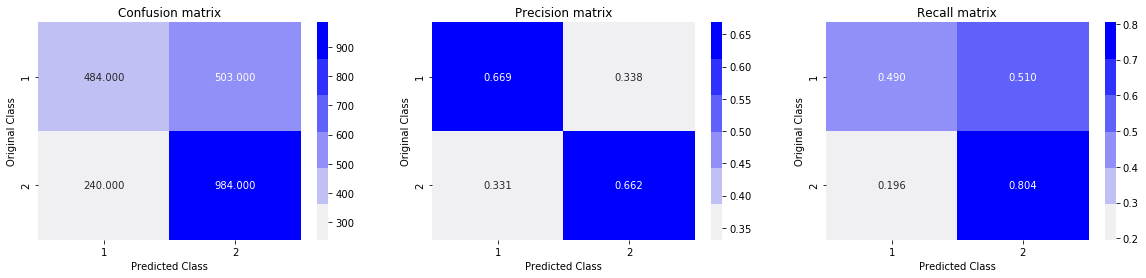

In [19]:
plot_confusion_matrix(test_Y, logreg_predict)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree=DecisionTreeClassifier()
model_3=dtree.fit(train_X,train_Y)

In [22]:
dtree_predict=model_3.predict(test_X)

In [23]:
accuracy_score(dtree_predict,test_Y)

0.715513342379014

In [24]:
print(classification_report(dtree_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.57      0.73      0.64       774
           1       0.83      0.71      0.76      1437

    accuracy                           0.72      2211
   macro avg       0.70      0.72      0.70      2211
weighted avg       0.74      0.72      0.72      2211



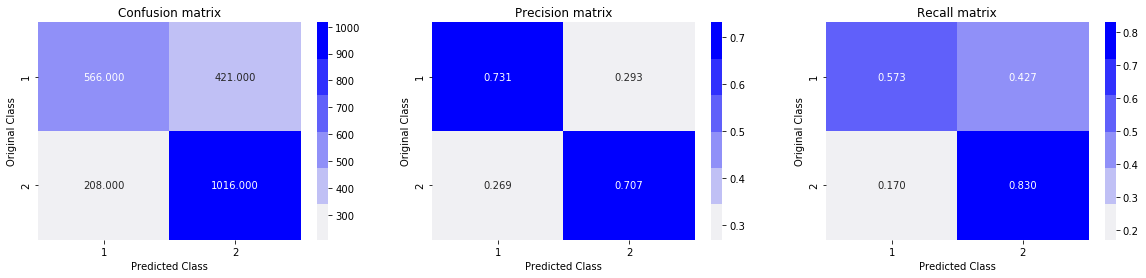

In [25]:
plot_confusion_matrix(test_Y, dtree_predict)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc=RandomForestClassifier()
model_4=rfc.fit(train_X,train_Y)

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [28]:
rfc_predict=model_4.predict(test_X)


In [29]:
accuracy_score(rfc_predict,test_Y)

0.7164179104477612

In [30]:
print(classification_report(rfc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.57      0.73      0.64       774
           1       0.83      0.71      0.76      1437

    accuracy                           0.72      2211
   macro avg       0.70      0.72      0.70      2211
weighted avg       0.74      0.72      0.72      2211



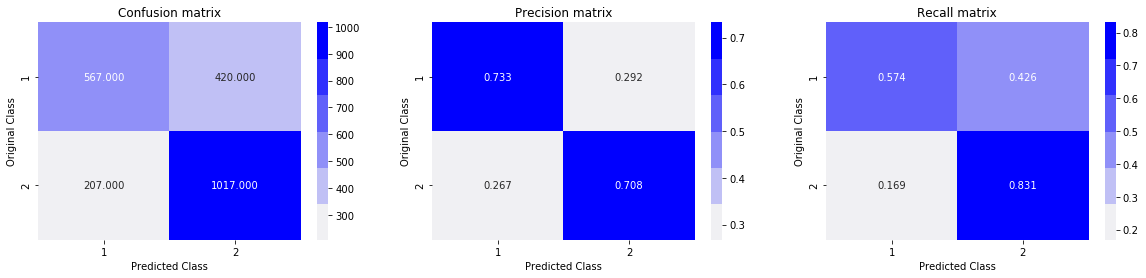

In [31]:
plot_confusion_matrix(test_Y, rfc_predict)

In [32]:
from sklearn.svm import SVC

In [33]:
svc=SVC()
model_5=svc.fit(train_X,train_Y)

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [34]:
svm_predict=model_5.predict(test_X)

In [35]:
accuracy_score(svm_predict,test_Y)

0.7109905020352781

In [36]:
print(classification_report(svm_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.56      0.73      0.63       756
           1       0.83      0.70      0.76      1455

    accuracy                           0.71      2211
   macro avg       0.70      0.72      0.70      2211
weighted avg       0.74      0.71      0.72      2211



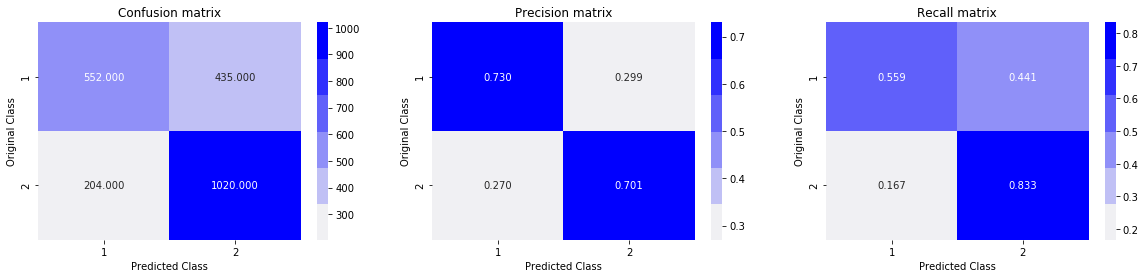

In [37]:
plot_confusion_matrix(test_Y, svm_predict)

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
adc=AdaBoostClassifier(n_estimators=5,learning_rate=1)
model_6=adc.fit(train_X,train_Y)

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [40]:
adc_predict=model_6.predict(test_X)

In [41]:
accuracy_score(adc_predict,test_Y)

0.6494798733604704

In [42]:
print(classification_report(adc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.45      0.66      0.53       676
           1       0.81      0.65      0.72      1535

    accuracy                           0.65      2211
   macro avg       0.63      0.65      0.63      2211
weighted avg       0.70      0.65      0.66      2211



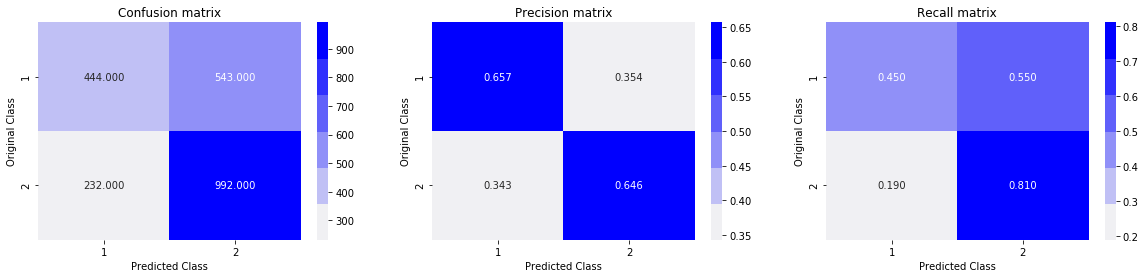

In [43]:
plot_confusion_matrix(test_Y, adc_predict)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn=KNeighborsClassifier(n_neighbors=3)
model_2= knn.fit(train_X,train_Y)

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [46]:
knn_predict=model_2.predict(test_X)

In [47]:
accuracy_score(knn_predict,test_Y)

0.6928991406603346

In [48]:
print(classification_report(test_Y,knn_predict))

              precision    recall  f1-score   support

          -1       0.72      0.50      0.59       987
           1       0.68      0.84      0.75      1224

    accuracy                           0.69      2211
   macro avg       0.70      0.67      0.67      2211
weighted avg       0.70      0.69      0.68      2211



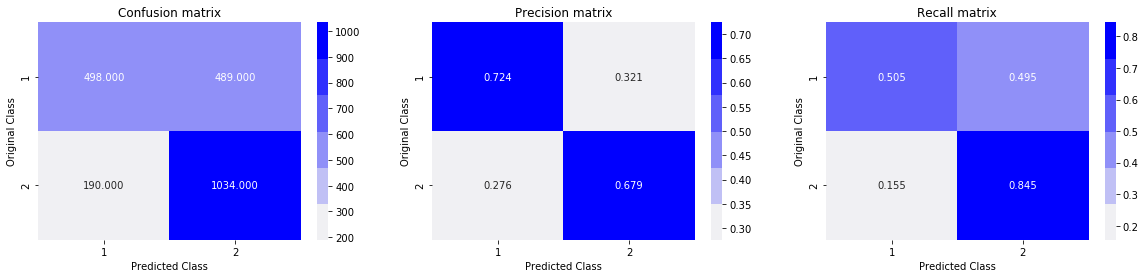

In [49]:
plot_confusion_matrix(test_Y, knn_predict)


In [50]:
print('Logistic Regression Accuracy:',accuracy_score(logreg_predict,test_Y))
print('K-Nearest Neighbour Accuracy:',accuracy_score(knn_predict,test_Y))
print('Decision Tree Classifier Accuracy:',accuracy_score(dtree_predict,test_Y))
print('Random Forest Classifier Accuracy:',accuracy_score(rfc_predict,test_Y))
print('support Vector Machine Accuracy:',accuracy_score(svm_predict,test_Y))
print('Adaboost Classifier Accuracy:',accuracy_score(adc_predict,test_Y))

Logistic Regression Accuracy: 0.6639529624604251
K-Nearest Neighbour Accuracy: 0.6928991406603346
Decision Tree Classifier Accuracy: 0.715513342379014
Random Forest Classifier Accuracy: 0.7164179104477612
support Vector Machine Accuracy: 0.7109905020352781
Adaboost Classifier Accuracy: 0.6494798733604704
